# Extract audio features with librosa
If you want to read more about theory, please go to the:  
https://tkocza.github.io/data_miners/posts/Voice_features_extraction_with_libROSA/


In [86]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np

In [87]:
sample, sampling_rate = librosa.load("Sample_record.wav", sr=None)

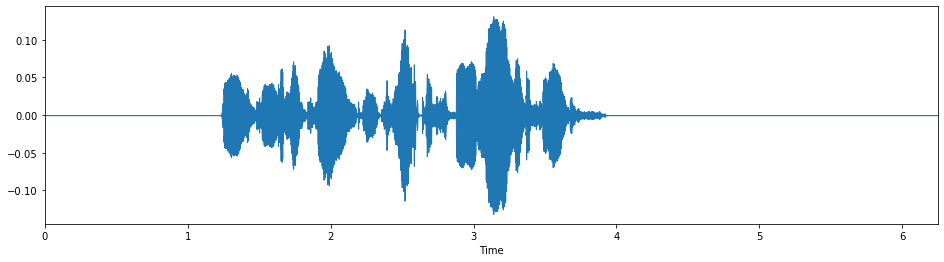

In [88]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(sample, sr=sampling_rate)

### Data after short-term fourier transformation

In [89]:
S, phase = librosa.magphase(librosa.stft(sample))

# Features extraction

## Amplitude to dB

In [90]:
amp_to_db = librosa.amplitude_to_db(S, ref=np.max)

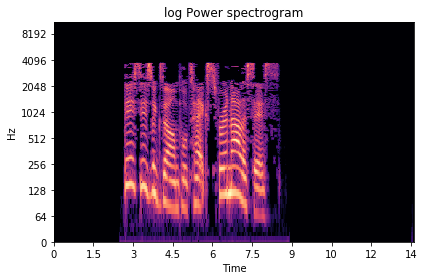

In [91]:
plt.figure()
librosa.display.specshow(amp_to_db,
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

## Voice energy

In [92]:
rms_vector = librosa.feature.rms(S=S)

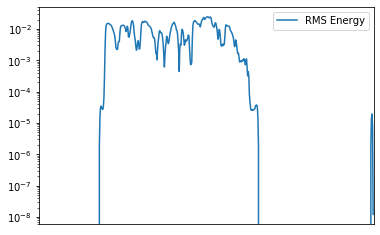

In [93]:
plt.figure()
plt.semilogy(rms_vector.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms_vector.shape[-1]])
plt.legend()

## Zero crossing rate

In [94]:
zero_crossing_rate_vector = librosa.feature.zero_crossing_rate(sample,frame_length=1048, hop_length=512)

In [95]:
len(zero_crossing_rate_vector[0])

587

In [96]:
len(sample)

300032

## Mel spectrogram

In [97]:
melspectrogram_vector = librosa.feature.melspectrogram(y=sample, sr=sampling_rate)

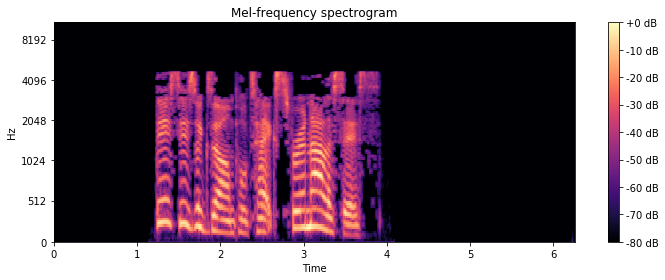

In [98]:
plt.figure(figsize=(10, 4))
melspectrogram_vector_dB = librosa.power_to_db(melspectrogram_vector, ref=np.max)
librosa.display.specshow(melspectrogram_vector_dB, x_axis='time',y_axis='mel', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

## Fourier tempogram

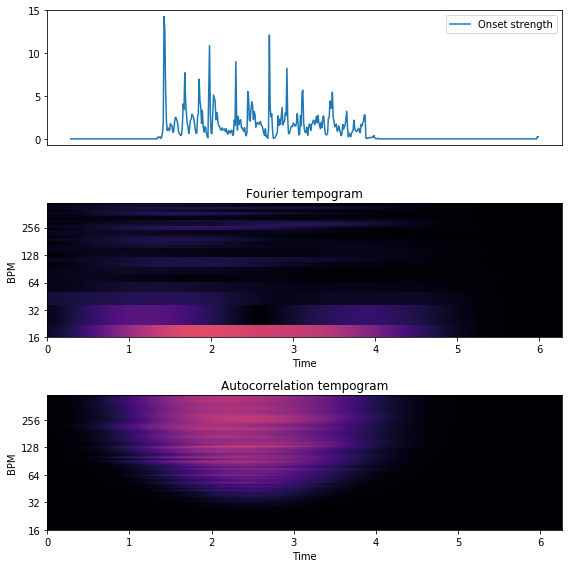

In [99]:
# Compute local onset autocorrelation
hop_length = 512
oenv = librosa.onset.onset_strength(y=sample, sr=sampling_rate, hop_length=hop_length)
tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sampling_rate, hop_length=hop_length)
# Compute the auto-correlation tempogram, unnormalized to make comparison easier
ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sampling_rate, hop_length=hop_length, norm=None)

plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(oenv, label='Onset strength')
plt.xticks([])
plt.legend(frameon=True)
plt.axis('tight')
plt.subplot(3, 1, 2)
librosa.display.specshow(np.abs(tempogram), sr=sampling_rate, hop_length=hop_length,
                         x_axis='time', y_axis='fourier_tempo', cmap='magma')
plt.title('Fourier tempogram')
plt.subplot(3, 1, 3)
librosa.display.specshow(ac_tempogram, sr=sampling_rate, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma')
plt.title('Autocorrelation tempogram')
plt.tight_layout()
plt.show()

## Spectral centroids

In [100]:
spectral_centroid_vector = librosa.feature.spectral_centroid(y=sample, sr=sampling_rate)

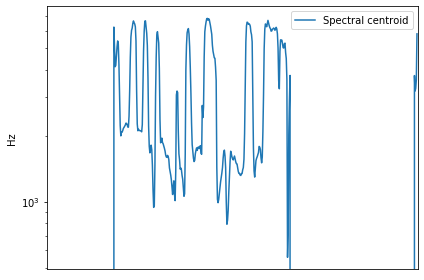

In [101]:
plt.figure()
plt.semilogy(spectral_centroid_vector.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spectral_centroid_vector.shape[-1]])
plt.legend()
plt.tight_layout()
plt.show()

## Spectral roll-off

In [102]:
spectral_rolloff_vector = librosa.feature.spectral_rolloff(y=sample, sr=sampling_rate)

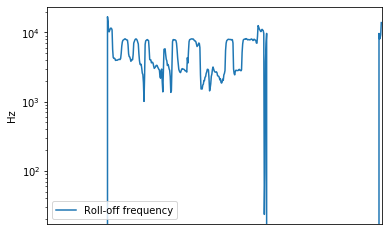

In [103]:
plt.figure()
plt.semilogy(spectral_rolloff_vector.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spectral_rolloff_vector.shape[-1]])
plt.legend()
plt.show()

# Hints

In [104]:
import pandas as pd

#### initialize data frame

In [105]:
df_features = pd.DataFrame

In [106]:
len(rms_vector[0])

587

In [107]:
len(spectral_centroid_vector[0])

587

In [108]:
df_features['energy'] = rms_vector[0].tolist

TypeError: 'type' object does not support item assignment

### To show together waveplot with extracted features, you can draw those factors on one plot, but you have to normalize feature data

https://musicinformationretrieval.com/spectral_features.html

In [116]:
len(sample)

300032

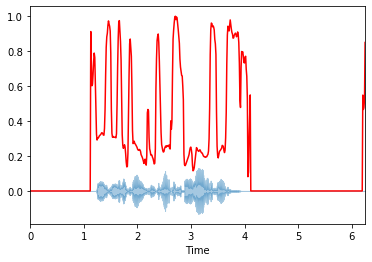

In [125]:
import sklearn
frames = range(len(spectral_centroid_vector[0]))
t = librosa.frames_to_time(frames, sr=sampling_rate)
librosa.display.waveplot(sample, sr=sampling_rate, alpha=0.4)
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_centroid_vector[0], axis=0), color='r') # normalize for visualization purposes